In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
for columns in df.select_dtypes('object'):
    print(f'{columns:-<50}{df[columns].unique()}')

gender--------------------------------------------['Female' 'Male' 'Other']
smoking_history-----------------------------------['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [4]:
for columns in df.select_dtypes('int64'):
    print(f'{columns:-<50}{df[columns].unique()}')

hypertension--------------------------------------[0 1]
heart_disease-------------------------------------[1 0]
blood_glucose_level-------------------------------[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes------------------------------------------[0 1]


# TrainTest Encodage

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
trainset, testset = train_test_split(df,test_size=0.2,random_state=0)

In [7]:
trainset['diabetes'].value_counts()

0    73203
1     6797
Name: diabetes, dtype: int64

In [8]:
testset['diabetes'].value_counts()

0    18297
1     1703
Name: diabetes, dtype: int64

In [9]:
"""
def encode_gender(df):
    code={
        'female':0,
        'male':1,
        'other':2
    }
    df[columns]=df[columns].map(code)
    for columns in df.select_dtypes('object').columns:
        df[columns]=df[columns].map(code)
"""

"\ndef encode_gender(df):\n    code={\n        'female':0,\n        'male':1,\n        'other':2\n    }\n    df[columns]=df[columns].map(code)\n    for columns in df.select_dtypes('object').columns:\n        df[columns]=df[columns].map(code)\n"

In [10]:
# Merge list for encoder
def list_merge(one,two):
    merged={}
    if(len(one)==len(two)):
        for i in range(len(one)):
            merged[one[i]]=two[i]
        return merged;
    else:
        return 'one!=two'

In [11]:
# Auto encoding of all object type variables
code = LabelEncoder()
def encoder(df):
    for columns in df.select_dtypes('object').columns:
        unique = df[columns].unique()
        encoded = code.fit_transform(unique)
        merged = list_merge(unique,encoded)
        #print(columns,' ',merged)
        df[columns]= df[columns].map(merged)

In [12]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
def preprocessing(df):
    encoder(df)
    X = df.drop('diabetes',axis=1)
    y = df['diabetes']
    print(y.value_counts())
    return X,y

In [14]:
X_train, y_train = preprocessing(trainset)

0    73203
1     6797
Name: diabetes, dtype: int64


In [15]:
X_test, y_test = preprocessing(testset)

0    18297
1     1703
Name: diabetes, dtype: int64


In [16]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
10382,0,2.0,0,0,0,16.45,6.2,159
73171,0,55.0,0,0,4,24.59,6.0,130
30938,0,24.0,0,0,0,21.77,4.5,130
99310,1,30.0,0,0,4,27.32,6.2,159
58959,1,13.0,0,0,0,18.37,6.5,130


In [17]:
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
3582,0,52.0,0,0,4,27.32,4.8,140
60498,1,56.0,0,0,4,27.32,4.8,100
53227,0,22.0,0,0,1,37.16,6.6,85
21333,0,49.0,0,0,0,43.83,5.0,160
3885,1,10.0,0,0,0,14.18,4.0,155


# Modelisation

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier(random_state=0)

# Evaluation

In [20]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import learning_curve

In [21]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score = learning_curve(model,X_train,y_train,cv=5, scoring='f1',train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='train score')
    plt.legend()

[[18235    62]
 [  520  1183]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.95      0.69      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



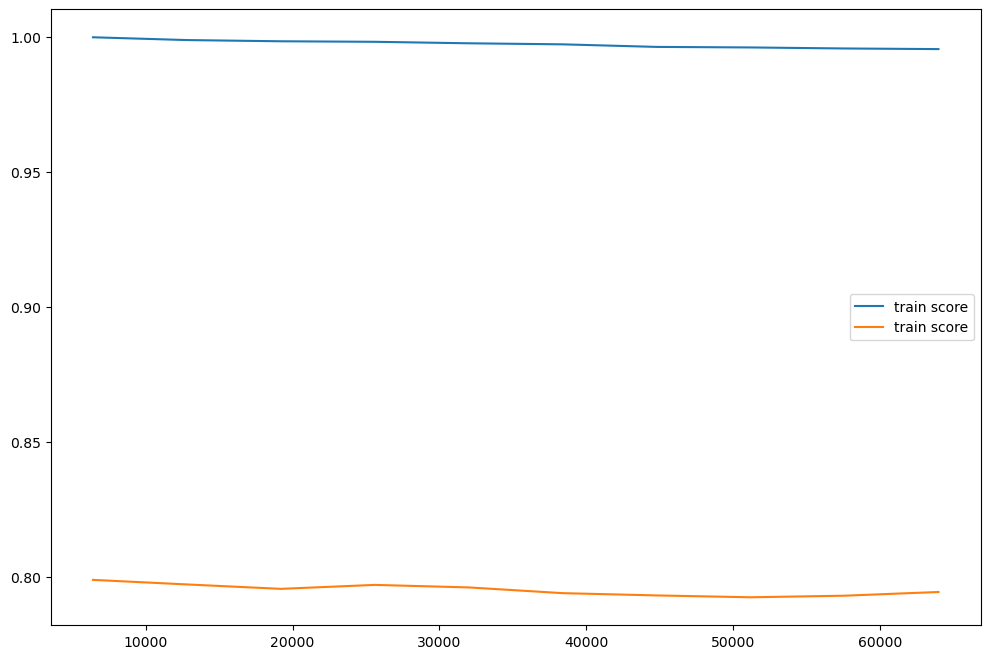

In [23]:
evaluation(model)